# Logistic Regression

In [4]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Probabilities to Odds
# odds = probability / (1 - probability)
# probability = odds / (1 + odds)

# Logistic function
# sigma(x) = 1 / (1 + np.exp(-x)) = np.exp(x) / (1 + np.exp(x))

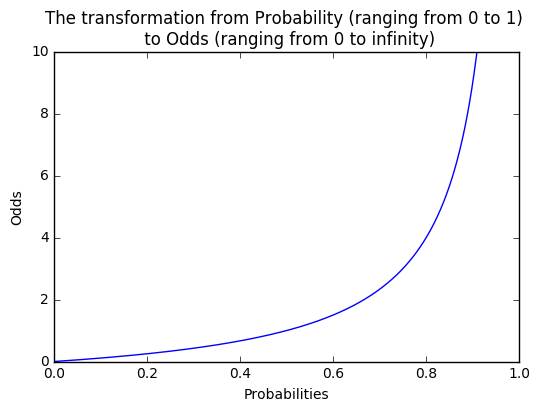

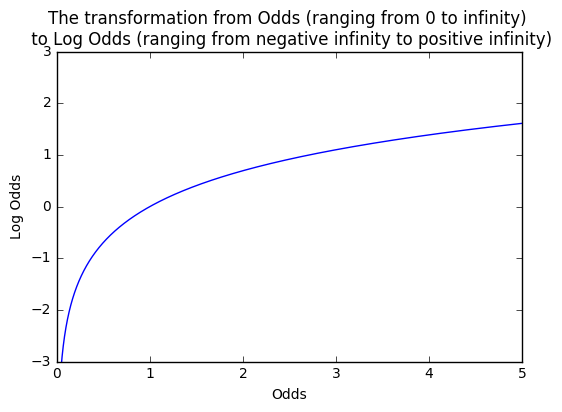

In [6]:
# Probabilities to odds
probabilities=np.arange(0,1,0.001)
odds=(probabilities/(1-probabilities))
plt.plot(probabilities, odds)
plt.ylim([0,10])
plt.title("The transformation from Probability (ranging from 0 to 1) \n to Odds (ranging from 0 to infinity)")
plt.xlabel("Probabilities")
plt.ylabel("Odds")
plt.show()

# Odds to log odds
logodds=np.log(odds)
plt.plot(odds, logodds)
plt.xlim([0,5])
plt.ylim([-3,3])
plt.title("The transformation from Odds (ranging from 0 to infinity) \n to Log Odds (ranging from negative infinity to positive infinity)")
plt.ylabel("Log Odds")
plt.xlabel("Odds")
plt.show()

Odds = probability/(1-probability)

Log Odds = natural logarithm of Odds 
- note np.log() calculates natural logarithm as the default, natural logarithm is the log to the base of the Euler number e = 2.718...


Logarithm expresses the power a number must be raised by to get the result:
- Log2(8)=3, meaning the number 2 (the base) must be raised by 3 to obtain 8
- Log10(100)=2, meaning the base 10 must be raised by 2 to obtain 100


Logistic regression is a great classification model because we can really interpret and understand what it's doing. Other models like support vector machines and random forests are pretty cool and get great results, but interpretability can be an issue. There's really a sense in which logistic regression is much more interpretable and for this reason it continues to be very popular.

In [7]:
# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Below, we fit a logistic regression model using statsmodels (patsy's) logistic regression formula


In [8]:
# model with no predictors
model1 = smf.logit(formula="high_quality ~ 1",data = df).fit() 
model1.summary() 

Optimization terminated successfully.
         Current function value: 0.495586
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6496
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                   0.000
Time:                        07:04:20   Log-Likelihood:                -3219.8
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.4080      0.031    -45.100      0.000        -1.469    -1.347
==============================================================================
"""

In [9]:
df["high_quality"].value_counts()

0.0    5220
1.0    1277
Name: high_quality, dtype: int64

In [10]:
# so probability of being high quality overall is
prob_high_quality_overall=1277/(5220+1277)
print(prob_high_quality_overall)

# which means odds of being high quality overall is
odds_high_quality_overall=prob_high_quality_overall/(1-prob_high_quality_overall)
print(odds_high_quality_overall)

# which means log odds of being high quality overall is
log_odds_high_quality_overall=np.log(odds_high_quality_overall)
print(log_odds_high_quality_overall)

# which is the intercept, hooray!

0.196552254887
0.244636015326
-1.40798382484


In [11]:
# now let's try adding in a single two-level predictor, is_red

model2 = smf.logit(formula="high_quality ~ is_red",data = df).fit() 
model2.summary() 

Optimization terminated successfully.
         Current function value: 0.491511
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6495
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                0.008222
Time:                        07:04:20   Log-Likelihood:                -3193.3
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                 3.429e-13
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.2867      0.035    -37.082      0.000        -1.355    -1.219
is_red        -0.5647      0.081     -6.985      0.000        -0.723    -0.406
==============================================================================
"""

In [12]:
# so red is negatively associated with high quality
# to understand how we got here let's take a look at the data
# there's clearly more red in the high_quality=0 than the high_quality=1 grouping

df.groupby("high_quality")["is_red"].value_counts()

high_quality  is_red
0.0           0.0       3838
              1.0       1382
1.0           0.0       1060
              1.0        217
Name: is_red, dtype: int64

In [13]:
# so again, how do these two coefficient numbers relate to probabilities/odds?
# when is_red is 0, that contribution disappears from the equation
# logit=beta_0+beta_1*is_red, and we are left with the intercept (i.e. beta_0)
# again we can find this value from the log odds given the probability based on the data values

probability_high_quality_when_is_red_0=1060/(1060+3838)
log_odds_high_quality_when_is_red_0=np.log(probability_high_quality_when_is_red_0/(1-probability_high_quality_when_is_red_0))
print(log_odds_high_quality_when_is_red_0)

-1.28668248946


In [14]:
# what about the case when is_red is 1?
# if we exponentiate the is_red coefficient we get the odds ratio
# (the fact that this is similar to the absolute value in this case is coincidence)

np.exp(model2.params.is_red)

0.56852660896158103

In [15]:
# what is an odds ratio? well the odds for is_red being 1 and 0 in the case high_quality=1
probability_is_red_1=217/(217+1382)
odds_is_red_1=probability_is_red_1/(1-probability_is_red_1)

probability_is_red_0=1060/(1060+3838)
odds_is_red_0=probability_is_red_0/(1-probability_is_red_0)

odds_ratio=odds_is_red_1/odds_is_red_0
print(odds_ratio)

0.568526608962


In [16]:
# let's try a model with a single continuous variable
model3 = smf.logit(formula="high_quality ~ density",data = df).fit() 
model3.summary() 

Optimization terminated successfully.
         Current function value: 0.454917
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6495
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                 0.08206
Time:                        07:04:21   Log-Likelihood:                -2955.6
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                6.159e-117
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    256.7096     11.955     21.473      0.000       233.279   280.140
density     -259.6646     12.033    -21.579      0.000      -283.250  -236.079
==============================================================================
"""

In [17]:
# these numbers look pretty large now, but let's think about
# what our intercept means now - that density is equal to 0
# but what is the range of density?
print(df["density"].min())
print(df["density"].max())

0.98711
1.03898


In [18]:
# so density doesn't actually go to zero, nor will it ever vary by as much as 1 unit
# so these numbers make a little more sense. Can we actually make some predictions?
# let's calculate the logit for some specific case

density_parameter=.985

logit_function=model3.params.Intercept+model3.params.density*density_parameter
odds_from_logit=np.exp(logit_function)
probability_from_odds=odds_from_logit/(1+odds_from_logit)
print(probability_from_odds)

0.71909046197


In [19]:
model4 = smf.logit(formula="high_quality ~ density + is_red",data = df).fit() 
model4.summary() 

Optimization terminated successfully.
         Current function value: 0.454287
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6494
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                 0.08333
Time:                        07:04:21   Log-Likelihood:                -2951.5
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                2.967e-117
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    274.2051     13.591     20.176      0.000       247.568   300.843
density     -277.3249     13.689    -20.259      0.000      -304.155  -250.495
is_red         0.2708      0.094      2.884      0.004         0.087     0.455
==============================================================================
"""

Note now that is_red is positively associated with quality, once density is taken into account
meaning that for the same density value, more reds are high quality than not
the intercept value now corresponds to the case when both density = 0 and is_red = 0.

These results mean that, holding density steady, the odds of being high quality for is_red = 1 are
np.exp(coef) times higher than is_red = 0 - that is, the odds ratio for is_red. These odds ratios remain
fixed whatever the value of density, though the ratio of probabilities would vary.

In [20]:
np.exp(model4.params.is_red)

1.3110066161823415

### Viewing a graph of probabilities

In [21]:
# invent a range of densities that corresponds with the expected range from the data
densities=np.arange(.97, 1.01, 0.002)
model_predictions=pd.DataFrame(densities, columns=["density"])
model_predictions_red=model_predictions.copy()
model_predictions_red["is_red"]=1
model_predictions_not_red=model_predictions.copy()
model_predictions_not_red["is_red"]=0

In [22]:
# make predictions based on these values
model_predictions_red["prob_high_quality"]=model4.predict(model_predictions_red)
model_predictions_not_red["prob_high_quality"]=model4.predict(model_predictions_not_red)

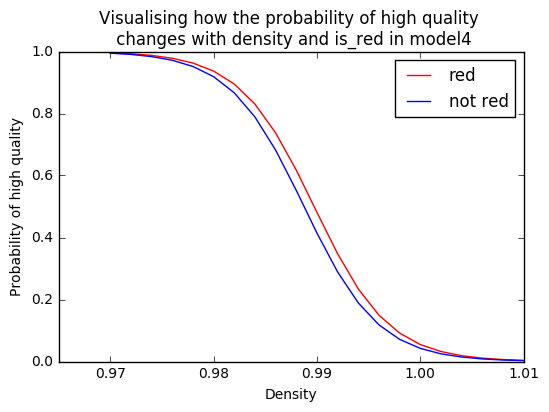

In [23]:
# plot the results
plt.plot(model_predictions_red["density"], model_predictions_red["prob_high_quality"], color="red", label="red")
plt.plot(model_predictions_not_red["density"], model_predictions_not_red["prob_high_quality"], color="blue", label="not red")
plt.title("Visualising how the probability of high quality \n changes with density and is_red in model4")
plt.ylabel("Probability of high quality")
plt.xlabel("Density")
plt.legend()
plt.show()

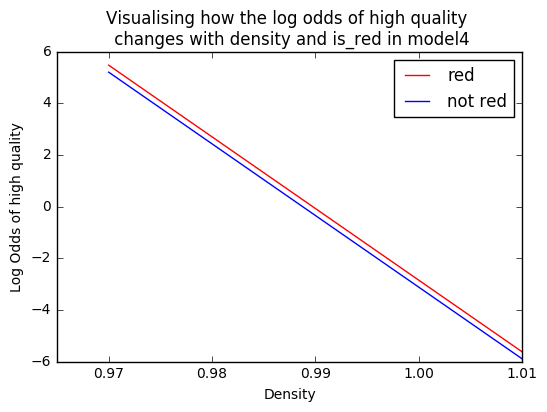

In [28]:
model_predictions_red["log_odds"]=np.log((model_predictions_red["prob_high_quality"]/(1-model_predictions_red["prob_high_quality"])))
model_predictions_not_red["log_odds"]=np.log((model_predictions_not_red["prob_high_quality"]/(1-model_predictions_not_red["prob_high_quality"])))
plt.plot(model_predictions_red["density"], model_predictions_red["log_odds"], color="red", label="red")
plt.plot(model_predictions_not_red["density"], model_predictions_not_red["log_odds"], color="blue", label="not red")
plt.title("Visualising how the log odds of high quality \n changes with density and is_red in model4")
plt.ylabel("Log Odds of high quality")
plt.xlabel("Density")
plt.legend()
plt.show()

So we can really see what is going on here, unlike some later models we will look at where we don't get the same
ability to clearly visualise results in this way. This is a big part of the appeal of logistic regression.

Note that if the density were positively associated with high quality the sigma would be reversed in the manner in
which the concept was first introduced.

Which of the models we built actually fits better? the one with just density or the one with density and is_red?
If we compare the log likelihoods we can judge if there has been a statistically significant improvement
in the likelihood (i.e. has the likelihood become larger, meaning log likelihood has become less negative
or gotten closer to zero meaning it has increased... slightly confusing at first since it is negative generally).

Note that generally increasing the number of parameters will likely always lead to some increase in the log likelihood
so we should test the magnitude of that difference to get a sense whether it is significant.


In [24]:
from scipy import stats

llf_extra_term = model4.llf
llf_restricted = model3.llf
df_extra_term = model4.df_resid 
df_restricted = model3.df_resid 
degrees_freedom = (df_restricted - df_extra_term)
likelihood_ratio = 2*(llf_extra_term-llf_restricted)
likelihood_ratio_pvalue = stats.chi2.sf(likelihood_ratio, df=degrees_freedom)
print(likelihood_ratio)
print(likelihood_ratio_pvalue)

8.18623224793
0.00422094972922


The small p value above indicates that the additional parameter is_red is significant, note we also got this
from the summary which outputted p values for each parameter - this is a slightly different p value based on the
Wald test rather than a likelihood ratio test, this tests whether the parameter coefficient itself is significantly
different from zero, rather than comparing the likelihoods of two different models including the parameter or not
but as you can see the result is essentially the same and you can reasonably use either (likelihood ratio is the more
robust test and Wald test is effectively an estimate of the likelihood ratio test).

We will talk more about other parameters for judging models in the next lesson.

The final aspect to consider in logistic regression is interaction terms.

In [25]:
# The density:pH syntax indicates an interaction term. You can also use the syntax pH*density to return
# all the combinations of pH, density, and pH:density without having to type them all out
model5 = smf.logit(formula="high_quality ~ is_red + density + pH + density:pH",data = df).fit() 
model5.summary() 

Optimization terminated successfully.
         Current function value: 0.446198
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6492
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Nov 2016   Pseudo R-squ.:                 0.09965
Time:                        07:04:21   Log-Likelihood:                -2898.9
converged:                       True   LL-Null:                       -3219.8
                                        LLR p-value:                1.432e-137
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2290.9973    258.352     -8.868      0.000     -2797.358 -1784.637
is_red         0.4442      0.104      4.289      0.000         0.241     0.647
density     2303.1930    260.040      8.857      0.000      1793.524  2812.862
pH           806.1243     81.616      9.877      0.000       646.160   966.088
density:pH  -810.9528     82.154     -9.871      0.000      -971.972  -649.934
==============================================================================
"""

So now we have statistically significant terms for both density and pH on their own and also an interaction term. When terms are on their own we refer to the variation of one with the others held fixed. In this interaction case this is
no longer valid. Now we consider how the level of one variable affects the variation of the other as it changes. 